In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('spam.csv', encoding='latin1')
dataset.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4606,ham,Been running but only managed 5 minutes and th...,NaN,NaN,NaN
4914,ham,We took hooch for a walk toaday and i fell ove...,NaN,NaN,NaN
5285,spam,URGENT! You have won a 1 week FREE membership ...,NaN,NaN,NaN
2743,ham,But my family not responding for anything. Now...,NaN,NaN,NaN
5505,ham,What i told before i tell. Stupid hear after i...,NaN,NaN,NaN


# Removing Null values

In [4]:
dataset.shape

(5572, 5)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
dataset = dataset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [7]:
dataset.shape

(5572, 2)

# Renaming the columns for better understanding

In [8]:
dataset.rename(columns={'v1' : 'output', 'v2' : 'text'}, inplace=True)

In [9]:
dataset.sample(5)

,output,text
4037,ham,Hope you are not scared!
3502,ham,Free any day but i finish at 6 on mon n thurs...
2193,ham,I called but no one pick up e phone. I ask bot...
711,ham,It just seems like weird timing that the night...
2155,ham,What year. And how many miles.


# Converting target values to numeric form

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
dataset['output'] = le.fit_transform(dataset['output'])

In [12]:
dataset.tail()

,output,text
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


# Handing missing and duplicated values

In [13]:
dataset.isnull().sum()

output    0
text      0
dtype: int64

In [14]:
dataset.duplicated().sum()

403

In [15]:
#dropping duplicates
dataset = dataset.drop_duplicates(keep='first')

In [16]:
dataset.shape

(5169, 2)

In [17]:
dataset.tail()

,output,text
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


# Stastical analysis of the dataset

In [18]:
dataset.describe()

,output
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [19]:
dataset['output'].value_counts()

0    4516
1     653
Name: output, dtype: int64

In [20]:
sns.set()

<Axes: xlabel='output', ylabel='count'>

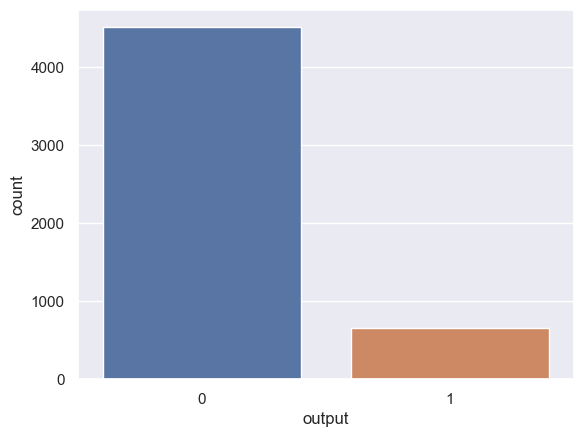

In [21]:
sns.countplot(x='output', data=dataset)

# Balancing dataset

In [48]:
pip install nltk

In [22]:
import nltk

In [50]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aniks\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [23]:
dataset['char'] = dataset['text'].apply(len)

In [24]:
dataset.head()

,output,text,char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
dataset['word'] = dataset['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
dataset.head()

,output,text,char,word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
dataset['sentence'] = dataset['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [35]:
dataset.head()

,output,text,char,word,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
dataset[dataset['output'] == 0][['char', 'word', 'sentence']].describe()

,char,word,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [38]:
dataset[dataset['output'] == 1][['char', 'word', 'sentence']].describe()

,char,word,sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<Axes: xlabel='char', ylabel='Count'>

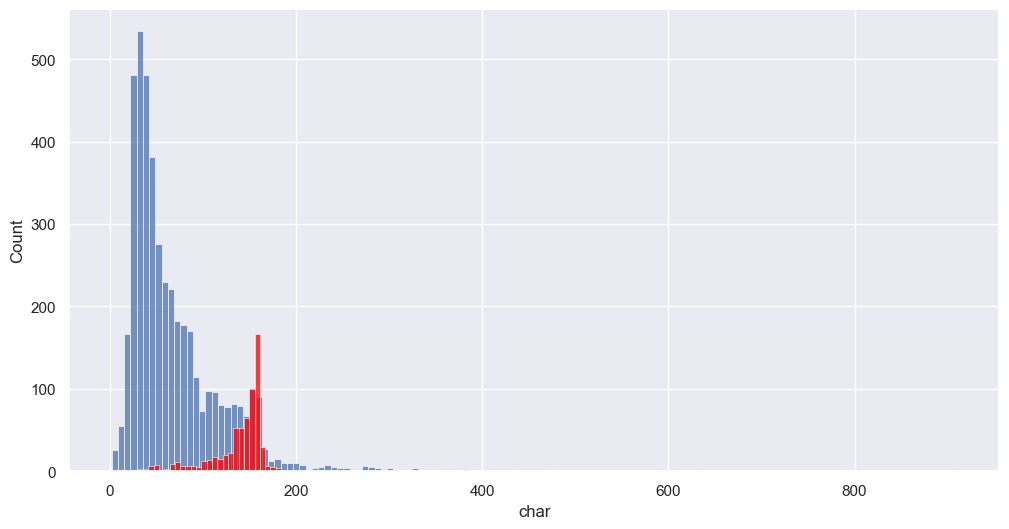

In [50]:
plt.figure(figsize = (12, 6))
sns.histplot(dataset[dataset['output'] == 0]['char'])
sns.histplot(dataset[dataset['output'] == 1]['char'], color='red')

<Axes: xlabel='word', ylabel='Count'>

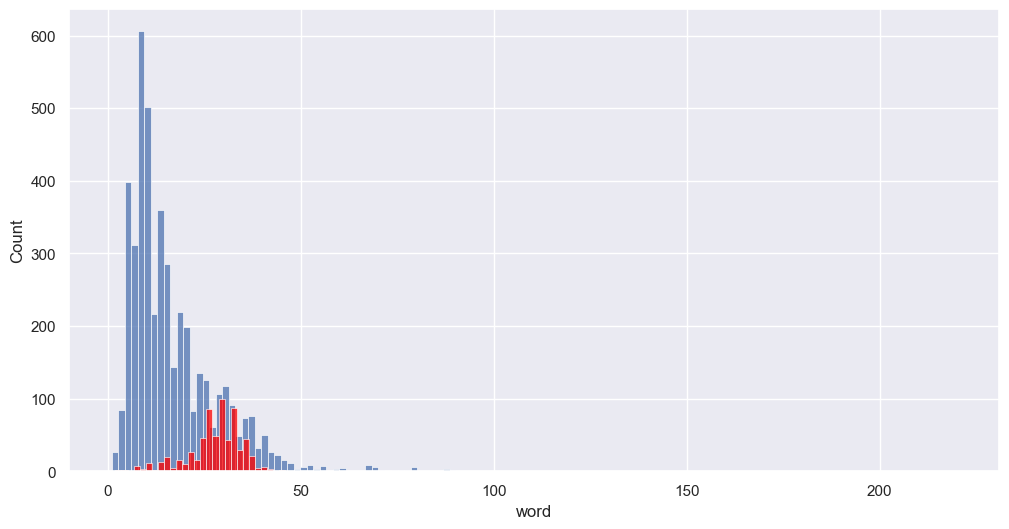

In [51]:
plt.figure(figsize = (12, 6))
sns.histplot(dataset[dataset['output'] == 0]['word'])
sns.histplot(dataset[dataset['output'] == 1]['word'], color='red')

<Axes: xlabel='sentence', ylabel='Count'>

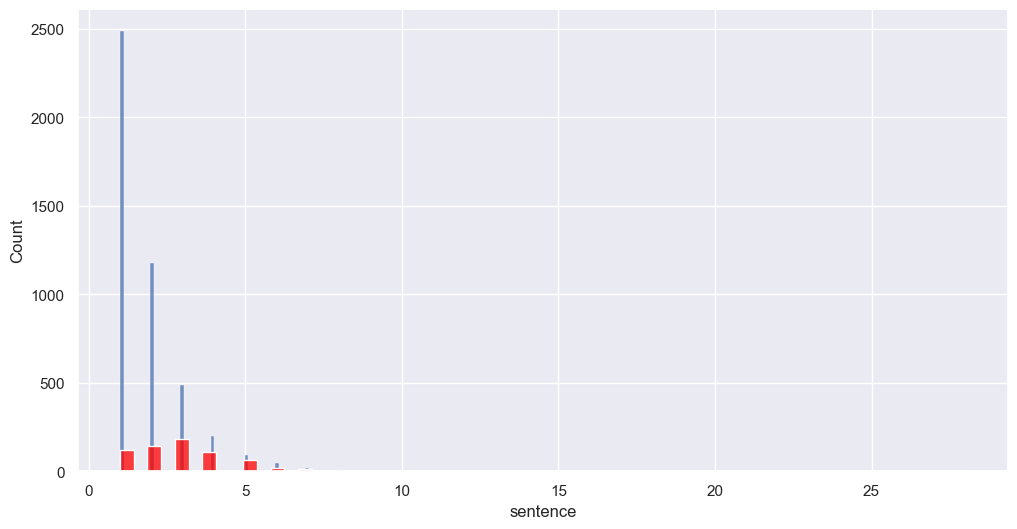

In [53]:
plt.figure(figsize = (12, 6))
sns.histplot(dataset[dataset['output'] == 0]['sentence'])
sns.histplot(dataset[dataset['output'] == 1]['sentence'], color='red')

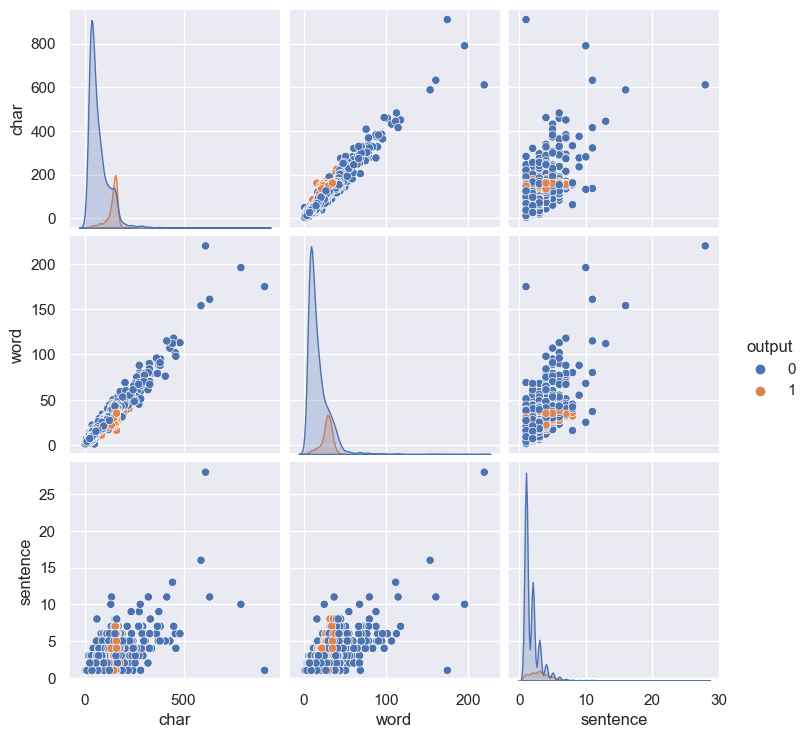

In [54]:
sns.pairplot(dataset, hue='output')

C:\Users\aniks\AppData\Local\Temp\ipykernel_8576\1178159375.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True)


<Axes: >

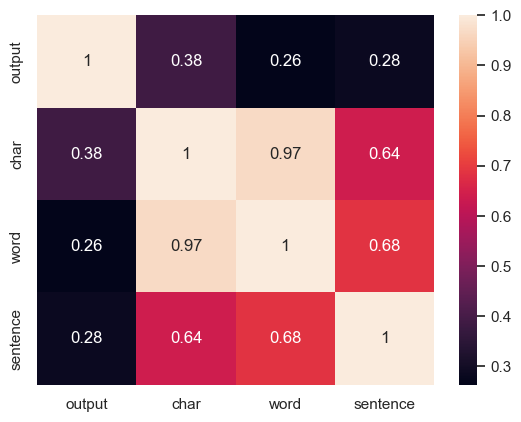

In [56]:
sns.heatmap(dataset.corr(), annot=True)

# Data preprocessing

In [78]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [79]:
transform_text("Hi, Anik Mahmud Shanto.. How are you?")

'hi anik mahmud shanto'

In [73]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aniks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [66]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [75]:
#Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [77]:
ps.stem('dancing')

'danc'

In [81]:
transform_text("I don't like the people surrounding me.. WHat should I do?")

'like peopl surround'

In [82]:
#adding transformed text to a new column
dataset['transformed_text'] = dataset['text'].apply(transform_text)

In [83]:
dataset.head()

,output,text,char,word,sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [91]:
!pip install wordcloud

In [98]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [100]:
spam_wc = wc.generate(dataset[dataset['output'] == 1]['transformed_text'].str.cat(sep=" "))

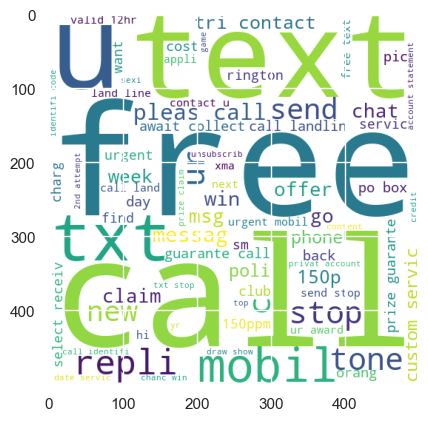

In [101]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(dataset[dataset['output'] == 0]['transformed_text'].str.cat(sep=" "))

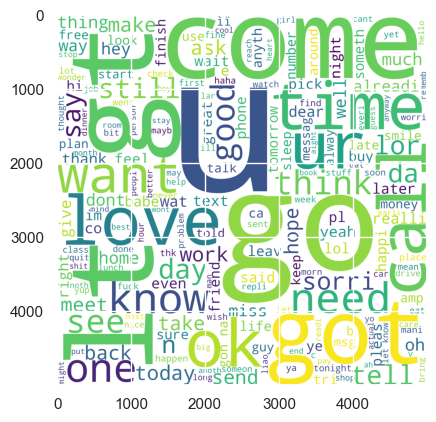

In [104]:
plt.imshow(ham_wc)

In [106]:
spam_corpus = []
for msg in dataset[dataset['output'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [107]:
len(spam_corpus)

9939

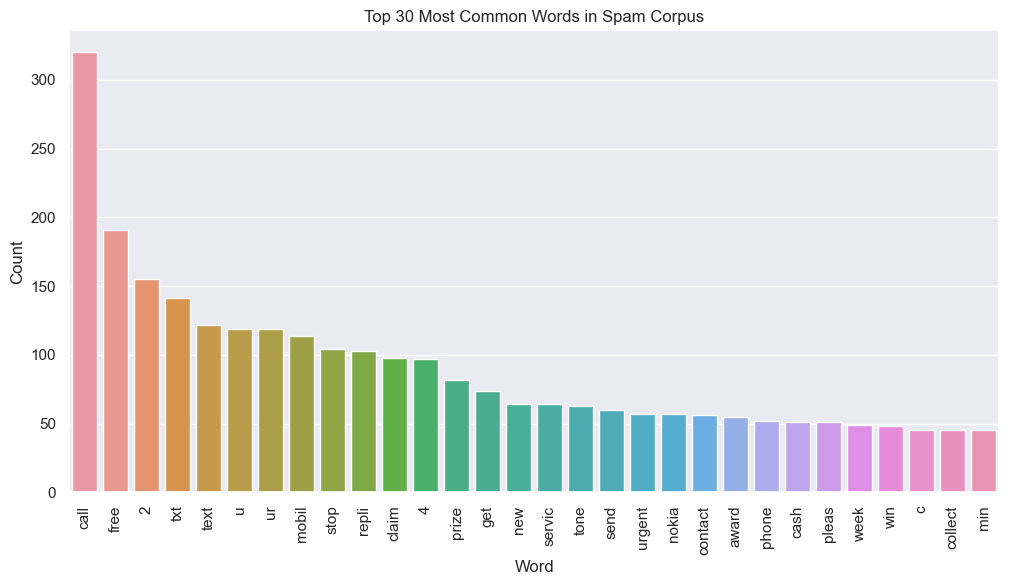

In [113]:
import collections
import seaborn as sns
import pandas as pd

# Assuming you have 'spam_corpus' defined with the text data
# spam_corpus = [...]

# Count the occurrences of each word
word_counter = collections.Counter(spam_corpus)

# Get the most common 30 words and their counts
common_words = word_counter.most_common(30)

# Create a DataFrame from the common words and their counts
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=common_words_df, x='Word', y='Count')
plt.xticks(rotation=90)
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.show()


In [116]:
ham_corpus = []
for msg in dataset[dataset['output'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [117]:
len(ham_corpus)

35394

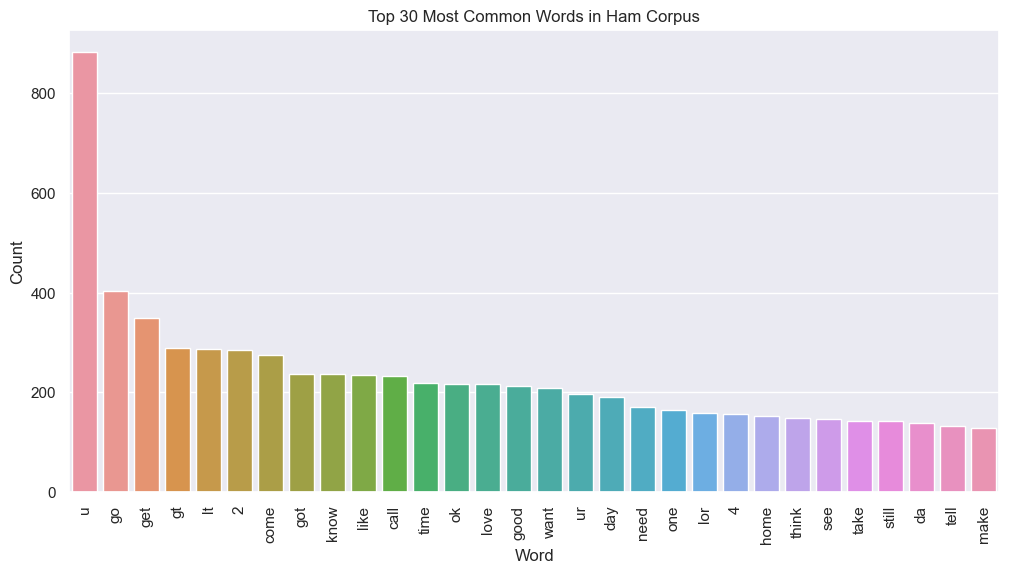

In [118]:
import collections
import seaborn as sns
import pandas as pd

# Assuming you have 'spam_corpus' defined with the text data
# spam_corpus = [...]

# Count the occurrences of each word
word_counter = collections.Counter(ham_corpus)

# Get the most common 30 words and their counts
common_words = word_counter.most_common(30)

# Create a DataFrame from the common words and their counts
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=common_words_df, x='Word', y='Count')
plt.xticks(rotation=90)
plt.title('Top 30 Most Common Words in Ham Corpus')
plt.show()


# Naive Bayes Model

In [119]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [120]:
X = cv.fit_transform(dataset['transformed_text']).toarray()

In [121]:
X.shape

(5169, 6708)

In [122]:
y = dataset['output'].values

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [124]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [135]:
gnb.fit(X_train, y_train)
pred1 = gnb.predict(X_test)

In [126]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [128]:
print(accuracy_score(y_test, pred1))
print(precision_score(y_test, pred1))
print(confusion_matrix(y_test, pred1))

0.8752417794970987
0.4835680751173709
[[802 110]
 [ 19 103]]


In [136]:
mnb.fit(X_train, y_train)
pred2 = mnb.predict(X_test)

In [131]:
print(accuracy_score(y_test, pred2))
print(precision_score(y_test, pred2))
print(confusion_matrix(y_test, pred2))

0.9700193423597679
0.8582677165354331
[[894  18]
 [ 13 109]]


In [133]:
bnb.fit(X_train, y_train)
pred3 = bnb.predict(X_test)

In [134]:
print(accuracy_score(y_test, pred3))
print(precision_score(y_test, pred3))
print(confusion_matrix(y_test, pred3))

0.965183752417795
0.9387755102040817
[[906   6]
 [ 30  92]]


In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()


In [140]:
X = tfidf.fit_transform(dataset['transformed_text']).toarray()

In [141]:
y = dataset['output'].values

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [143]:
gnb.fit(X_train, y_train)
pred1 = gnb.predict(X_test)

In [144]:
print(accuracy_score(y_test, pred1))
print(precision_score(y_test, pred1))
print(confusion_matrix(y_test, pred1))

0.8626692456479691
0.49166666666666664
[[774 122]
 [ 20 118]]


In [145]:
mnb.fit(X_train, y_train)
pred2 = mnb.predict(X_test)

In [146]:
print(accuracy_score(y_test, pred2))
print(precision_score(y_test, pred2))
print(confusion_matrix(y_test, pred2))

0.9574468085106383
1.0
[[896   0]
 [ 44  94]]


In [147]:
bnb.fit(X_train, y_train)
pred3 = bnb.predict(X_test)

In [148]:
print(accuracy_score(y_test, pred3))
print(precision_score(y_test, pred3))
print(confusion_matrix(y_test, pred3))

0.965183752417795
0.9722222222222222
[[893   3]
 [ 33 105]]
